In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

**Use Pandas to import the data from epa-sea-level.csv.**

In [238]:
df_o = pd.read_csv("epa-sea-level.csv")
df_o

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


**Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.**

**Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.**

**Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.**

**The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.**

In [239]:
def draw_plot():
    missing_x = np.arange(2014, 2051, 1)
    add_years = pd.DataFrame({"Year": missing_x})
    df = pd.concat([df_o, add_years])

    # Create scatter plot
    plt.plot(x, y, "bo")

    # Create first line of best fit
    condition1 = df["Year"] <= 2013
    x1 = df.loc[condition1]["Year"]
    y1 = df.loc[condition1]["CSIRO Adjusted Sea Level"]

    linear_reg1 = linregress(x1, y1)
    y_pred1 = linear_reg1.intercept + linear_reg1.slope * df["Year"]
    plt.plot(df["Year"], y_pred1, "r", linewidth=3)

    # Create second line of best fit
    condition2 = (df["Year"] >= 2000) & (df["Year"] <= 2013)
    x2 = df.loc[condition2]["Year"]
    y2 = df.loc[condition2]["CSIRO Adjusted Sea Level"]

    x3 = df.loc[df["Year"] >= 2000]["Year"]

    linear_reg2 = linregress(x2, y2)
    y_pred2 = linear_reg2.intercept + linear_reg2.slope * x3
    plt.plot(x3, y_pred2, "orange", linewidth=3)

    # Add labels and title
    plt.xlabel("Years")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

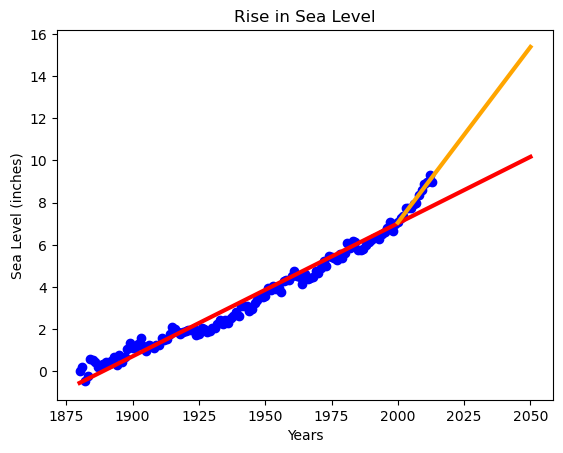

In [240]:
draw_plot()